###Aim
Encode a few simple stick figures that the layout algorithm is likely to display correctly. 

Generate a grammar and observe the derived samples. 

In [1]:
from logging import getLogger 
from eden.util import configure_logging
configure_logging(getLogger(),verbosity=1)

In [2]:
%matplotlib inline
#draw stick figures
import networkx as nx

/Users/costa/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/Users/costa/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


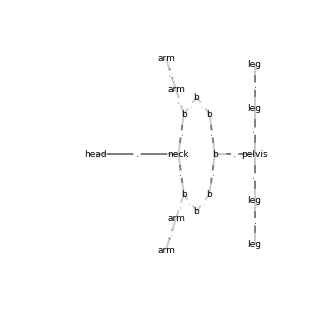

In [3]:
G=nx.Graph()
G.add_node(0, label='head')
G.add_node(1, label='neck')
G.add_node(11, label='b')
G.add_node(12, label='b')
G.add_node(13, label='b')
G.add_node(22, label='b')
G.add_node(23, label='b')
G.add_node(32, label='b')
G.add_node(33, label='b')
G.add_node(5, label='arm')
G.add_node(6, label='arm')
G.add_node(55, label='arm')
G.add_node(56, label='arm')
G.add_node(7, label='leg')
G.add_node(8, label='leg')
G.add_node(57, label='leg')
G.add_node(58, label='leg')
G.add_node(9, label='pelvis')
G.add_edge(0,1, label='.')
G.add_edge(1,22, label='.')
G.add_edge(1,23, label='.')
G.add_edge(9,11, label='.')
G.add_edge(11,12, label='.')
G.add_edge(11,13, label='.')
G.add_edge(12,32, label='.')
G.add_edge(13,33, label='.')
G.add_edge(22,32, label='.')
G.add_edge(23,33, label='.')
G.add_edge(9,7, label='.')
G.add_edge(9,8, label='.')
G.add_edge(22,5, label='.')
G.add_edge(23,6, label='.')
G.add_edge(5,55, label='.')
G.add_edge(6,56, label='.')
G.add_edge(7,57, label='.')
G.add_edge(8,58, label='.')


from eden.util import display
display.draw_graph(G, size=5, node_size=500, prog='circo')

g1 = G.copy()

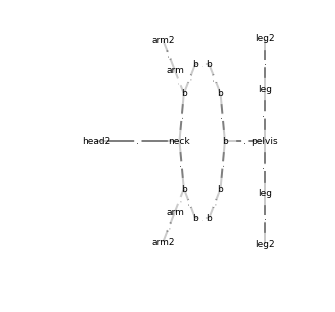

In [4]:
G=nx.Graph()
G.add_node(0, label='head2')
G.add_node(1, label='neck')
G.add_node(11, label='b')
G.add_node(12, label='b')
G.add_node(13, label='b')
G.add_node(22, label='b')
G.add_node(23, label='b')
G.add_node(32, label='b')
G.add_node(33, label='b')
G.add_node(42, label='b')
G.add_node(43, label='b')
G.add_node(5, label='arm')
G.add_node(6, label='arm')
G.add_node(55, label='arm2')
G.add_node(56, label='arm2')
G.add_node(7, label='leg')
G.add_node(8, label='leg')
G.add_node(57, label='leg2')
G.add_node(58, label='leg2')
G.add_node(9, label='pelvis')
G.add_edge(0,1, label='.')
G.add_edge(1,22, label='.')
G.add_edge(1,23, label='.')
G.add_edge(9,11, label='.')
G.add_edge(11,42, label='.')
G.add_edge(11,43, label='.')
G.add_edge(42,12, label='.')
G.add_edge(43,13, label='.')
G.add_edge(12,32, label='.')
G.add_edge(13,33, label='.')
G.add_edge(22,32, label='.')
G.add_edge(23,33, label='.')
G.add_edge(9,7, label='.')
G.add_edge(9,8, label='.')
G.add_edge(22,5, label='.')
G.add_edge(23,6, label='.')
G.add_edge(5,55, label='.')
G.add_edge(6,56, label='.')
G.add_edge(7,57, label='.')
G.add_edge(8,58, label='.')

from eden.util import display
display.draw_graph(G, size=5, node_size=500, prog='circo')

g2 = G.copy()

In [5]:
from graphlearn.graphlearn import GraphLearnSampler
from eden.converter.graph.gspan import gspan_to_eden
from eden.graph import Vectorizer
import itertools
gr = [g2,g1,g1,g1]
gr = [g1,g2,g2,g2]



sampler=GraphLearnSampler(radius_list=[0,1],thickness_list=[1],
                          min_cip_count=1, min_interface_count=1,
                         vectorizer=Vectorizer(complexity=2))
sampler.fit(gr)

interface id: 892921 [4 options]


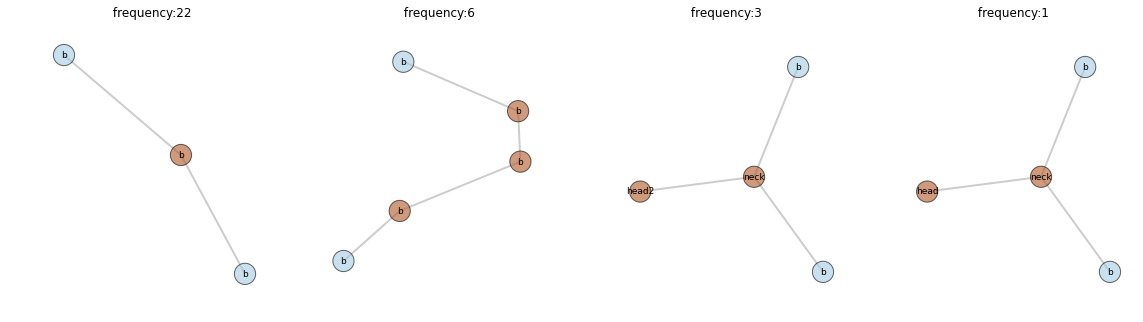

interface id: 881865 [2 options]


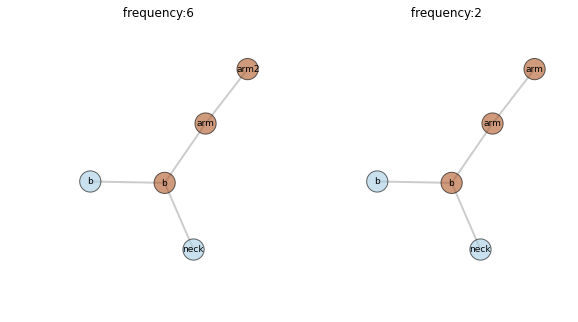

interface id: 835491 [2 options]


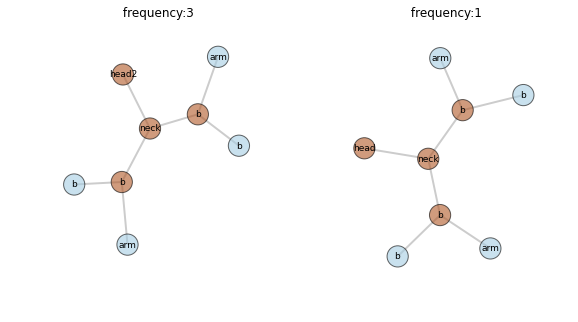

interface id: 790151 [2 options]


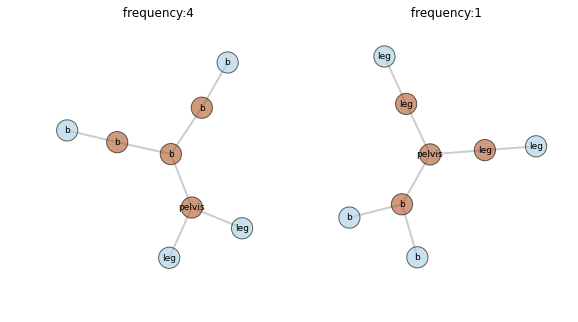

interface id: 553050 [2 options]


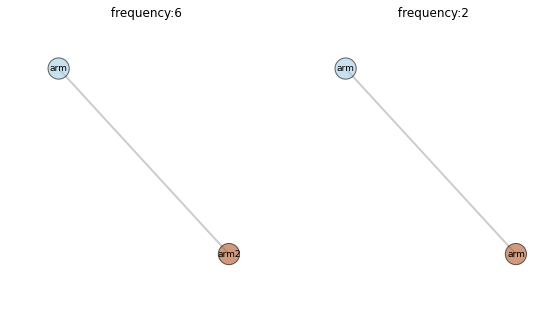

interface id: 527088 [2 options]


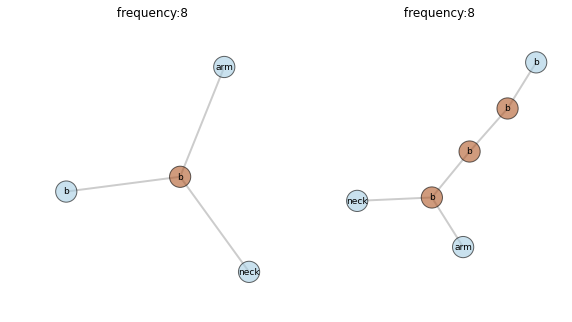

interface id: 431002 [2 options]


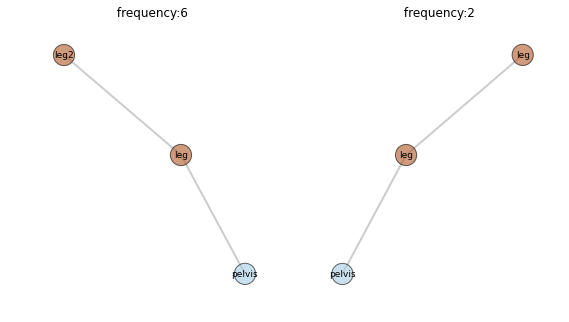

interface id: 411421 [2 options]


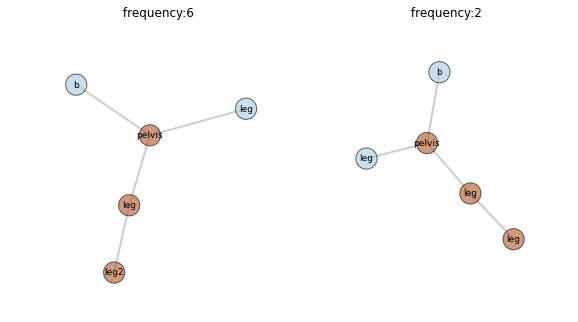

interface id: 340226 [2 options]


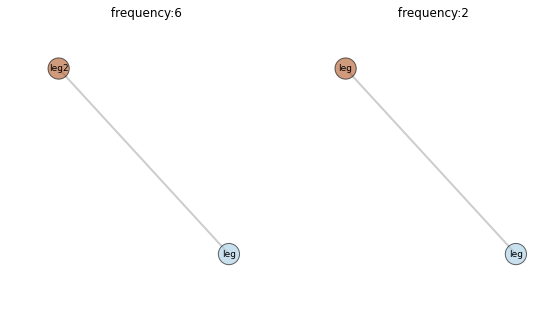

interface id: 297786 [2 options]


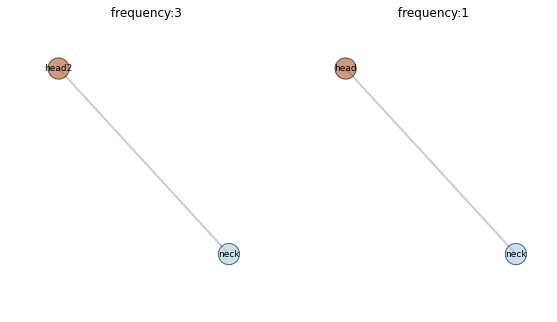

interface id: 203496 [2 options]


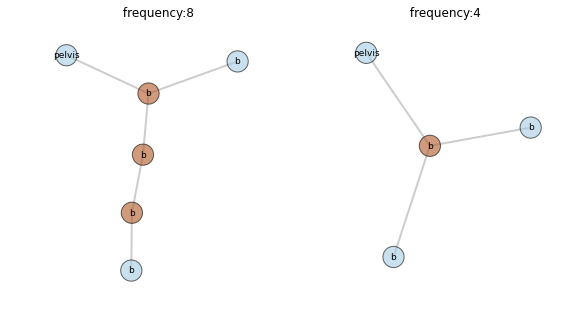

interface id: 202214 [2 options]


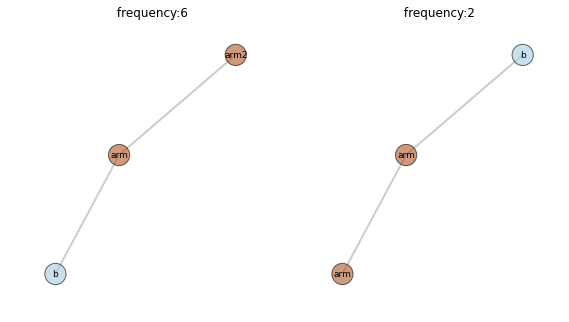

interface id: 973897 [1 options]


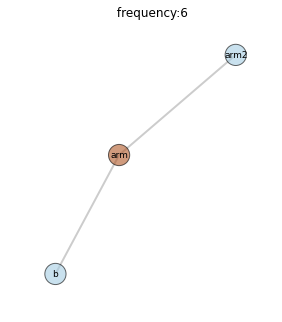

interface id: 940836 [1 options]


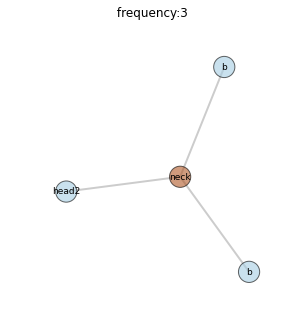

interface id: 839881 [1 options]


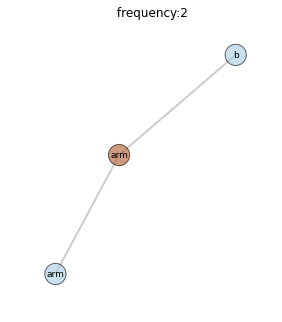

In [6]:
from graphlearn.utils.draw import draw_grammar
draw_grammar(sampler.grammar().productions,
             n_productions=15,n_graphs_per_line=6,
             size=5, colormap='Paired', invert_colormap=False,node_border=1,vertex_alpha=0.6, edge_alpha=0.2, node_size=450)

In [7]:
#sample
graphs = [g2]*4
graphs = [g1]*4

graphs = sampler.sample(graphs,
                        n_steps=40, n_samples=6,
                        probabilistic_core_choice=True,
                        same_radius=False,
                        same_core_size=False,
                        accept_annealing_factor=0.2, accept_static_penalty=1,
                        n_jobs=-1,burnin=0,select_cip_max_tries=800,keep_duplicates=True)

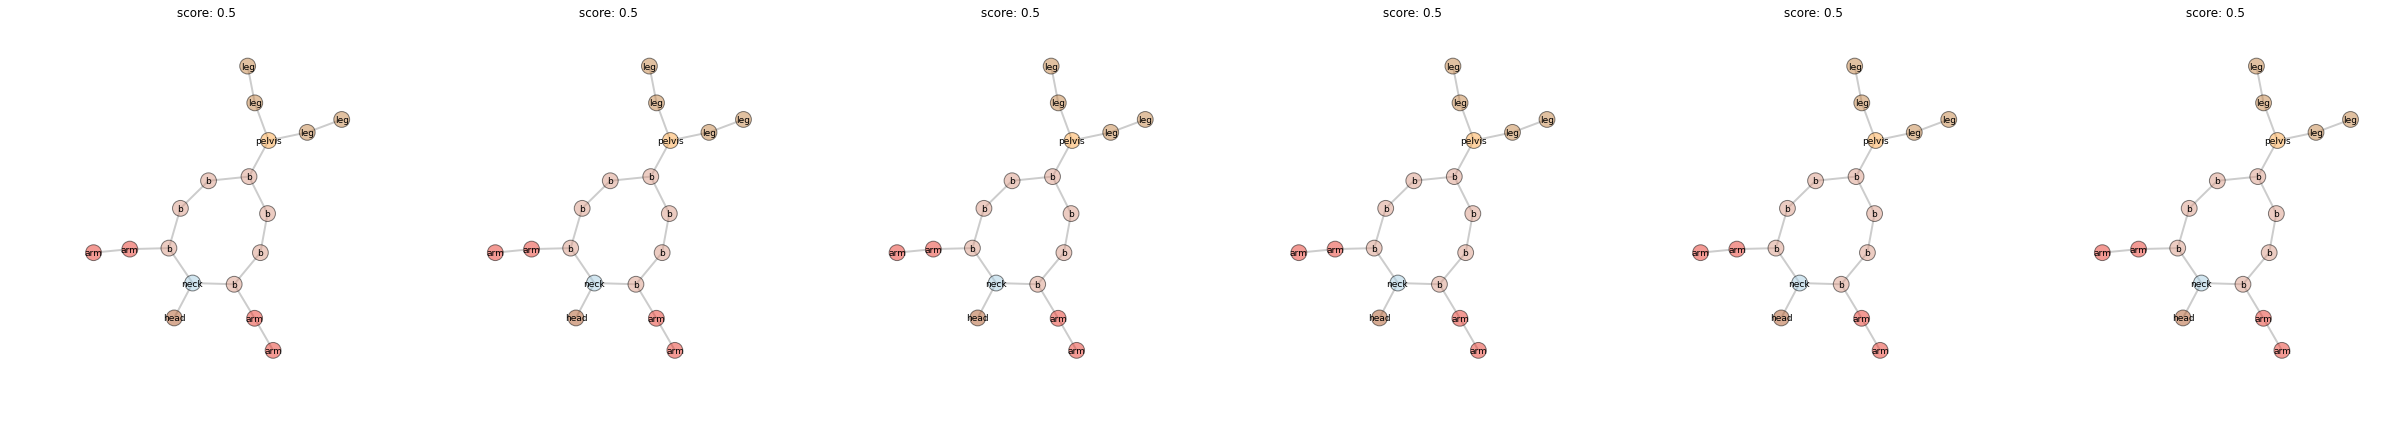

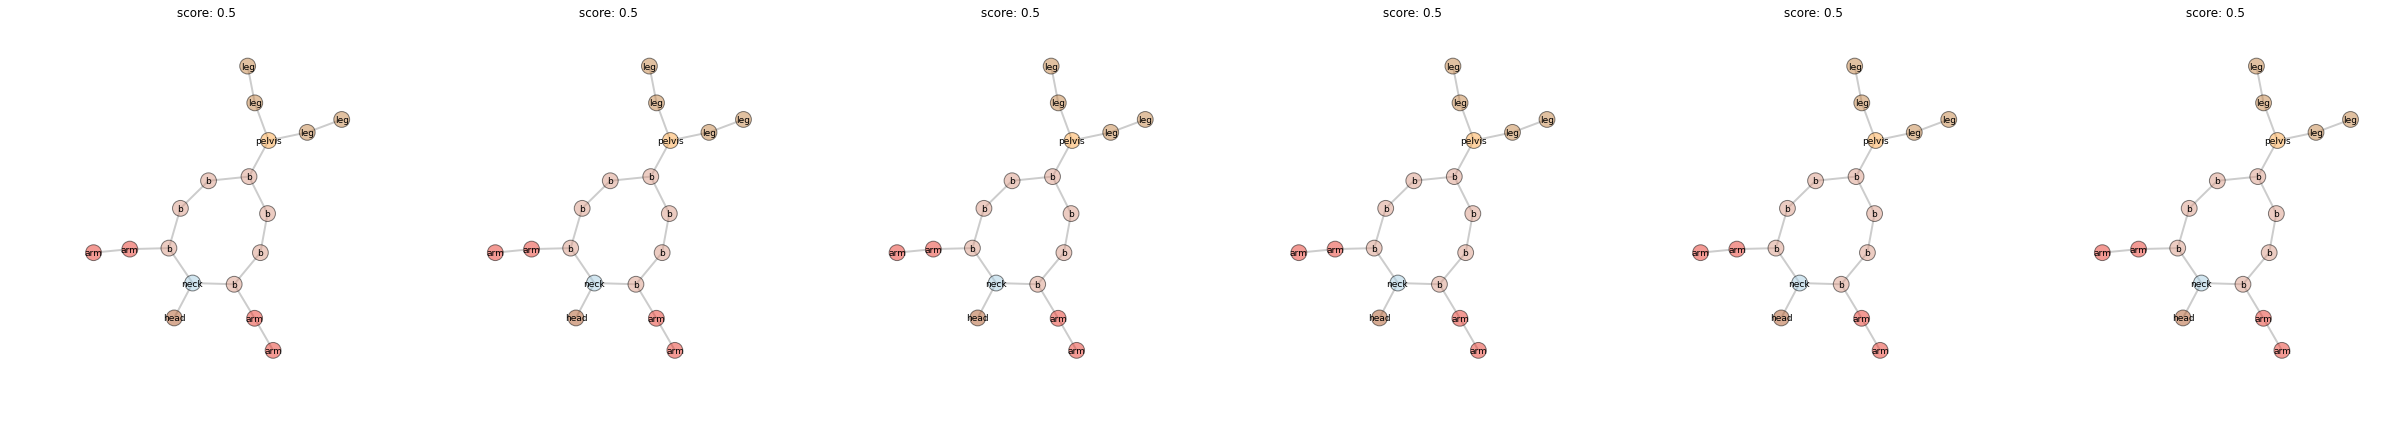

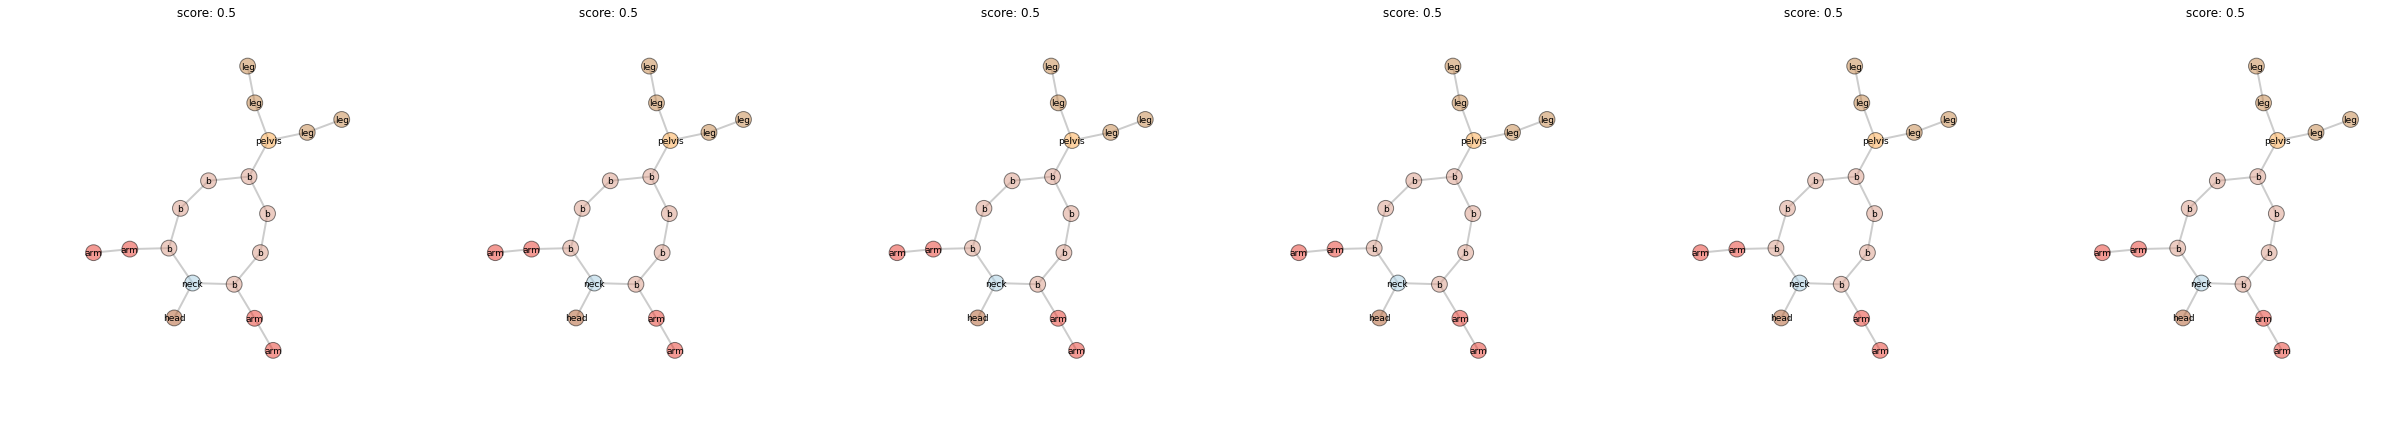

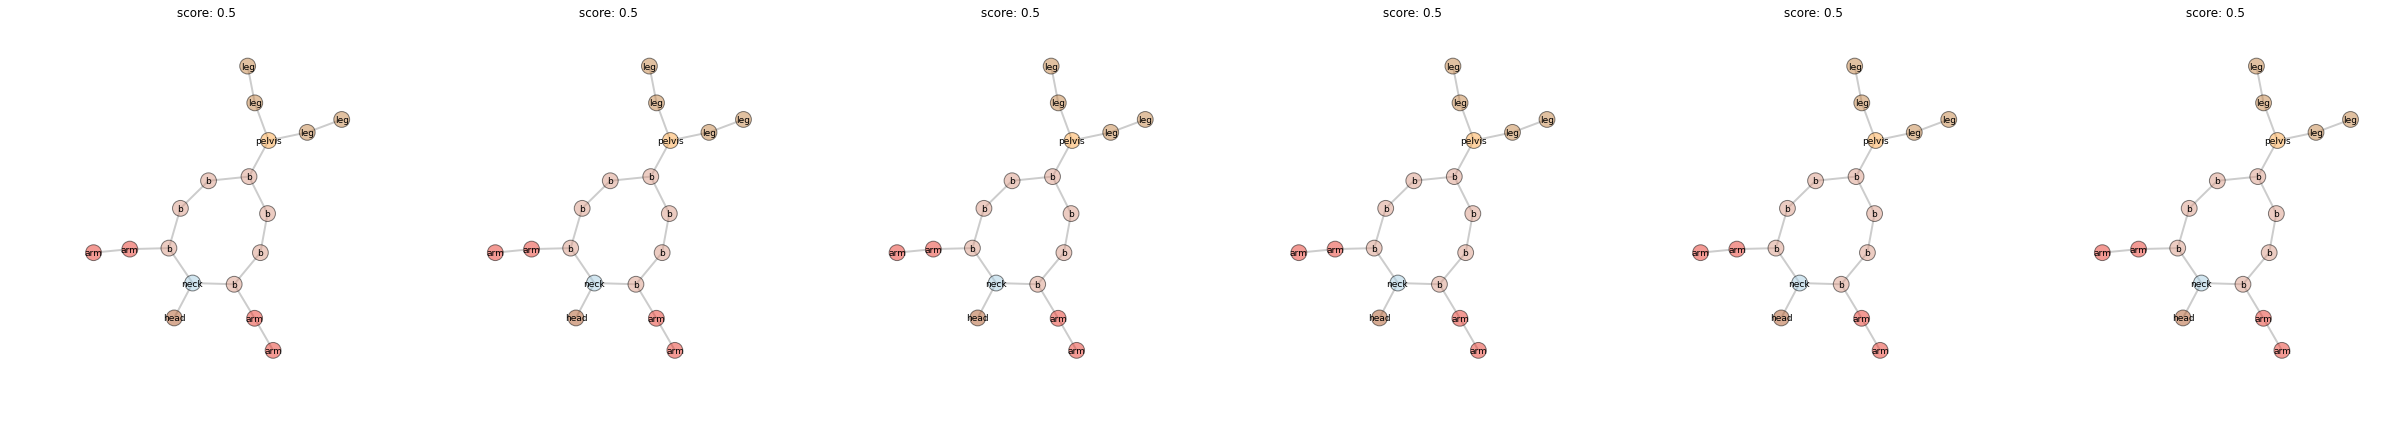

CPU times: user 4.39 s, sys: 425 ms, total: 4.81 s
Wall time: 13.6 s


In [8]:
%%time
# plot examples of sampling paths
from graphlearn.utils.draw import draw_graph_set_graphlearn, get_score_of_graph
scores=[]
for i,graph in enumerate(graphs):
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    draw_graph_set_graphlearn(path_graphs,
                   n_graphs_per_line=6, size=7, 
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
                   vertex_alpha=0.5, edge_alpha=0.2, node_size=250,
                   headlinehook=get_score_of_graph)

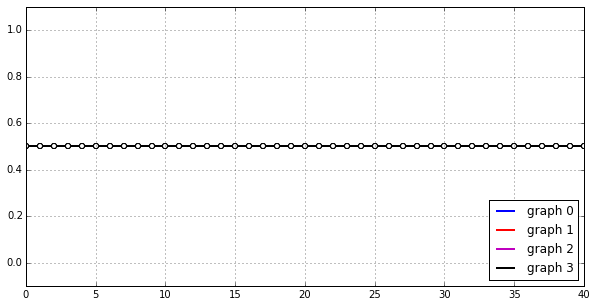

CPU times: user 232 ms, sys: 8.1 ms, total: 240 ms
Wall time: 237 ms


In [10]:
%%time
# plot sampling path score
from itertools import islice
import numpy as np
import pylab as plt
step=1
num_graphs_per_plot=4
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, linewidth=2, label='graph %d'%(j+i*num_graphs_per_plot))
        plt.plot(data, linestyle='None', markerfacecolor='white', marker='o', markeredgewidth=1,markersize=5)
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()

.